# Data Augementation - Fashion MNIST

In [24]:
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
% matplotlib inline
import vis
import pandas as pd

## Get Data 

In [3]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [2]:
labels = vis.fashion_mnist_label()

**Step 1: Prepare the images and labels**

In [4]:
# Reshape data for convlution network
x_train_conv = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test_conv = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Convert from 'uint8' to 'float32' and normalise the data to (0,1) 
x_train_conv =  x_train_conv.astype("float32") / 255
x_test_conv = x_test_conv.astype("float32") / 255

# convert class vectors to binary class matrices
y_train_class = keras.utils.to_categorical(y_train, 10)
y_test_class = keras.utils.to_categorical(y_test, 10)

## Data Augmentation

In [10]:
from keras.preprocessing.image import ImageDataGenerator

In [11]:
# this will do preprocessing and realtime data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    rotation_range=25,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

In [12]:
# Set up the generator
datagen.fit(x_train_conv)

Let us see the image augmentation

In [85]:
datagen.fit(x_train_conv[:1])

In [92]:
samples = datagen.flow(x_train_conv[:1])

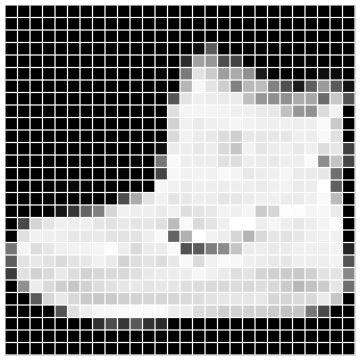

In [105]:
vis.imshow(x_train_conv[:1].squeeze())

In [111]:
range(3)

range(0, 3)

In [112]:
image

[]

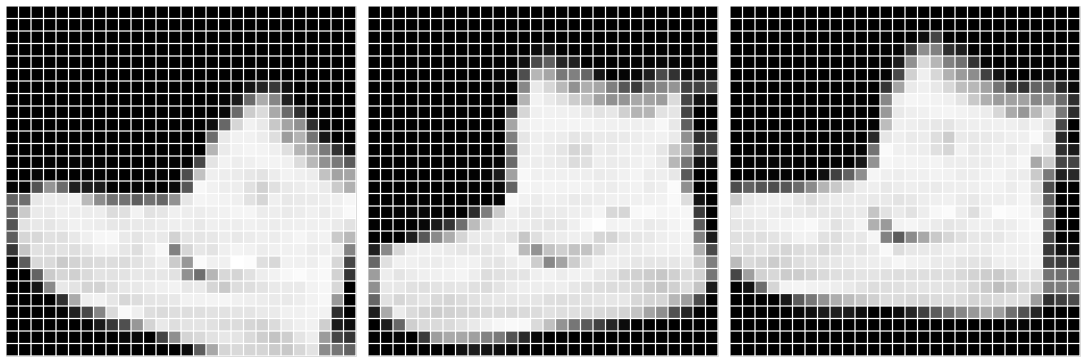

In [114]:
image = []
for i in range(3):
    img = samples.next()
    img = img.squeeze()
    image.append(vis.imshow(img))
image[0] | image[1] | image[2]

**Step 2: Build a CNN Model**

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [14]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.25))
cnn.add(Dense(10, activation='softmax'))

In [15]:
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
dropout_5 (Dropout)          (None, 3, 3, 128)         0         
__________

**Step 3: Compile the Model and Fit**

In [16]:
cnn.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [18]:
# fits the model on batches with real-time data augmentation:
history = cnn.fit_generator(datagen.flow(x_train_conv, y_train_class, batch_size=32), 
                             validation_data=(x_test_conv, y_test_class), use_multiprocessing=True,
                     steps_per_epoch=len(x_train_conv) / 32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 106s 57ms/step - loss: 0.7674 - acc: 0.7090 - val_loss: 0.5192 - val_acc: 0.8016
Epoch 2/5
1875/1875 [==============================] - 106s 56ms/step - loss: 0.5600 - acc: 0.7865 - val_loss: 0.4407 - val_acc: 0.8306
Epoch 3/5
1875/1875 [==============================] - 144s 77ms/step - loss: 0.5035 - acc: 0.8083 - val_loss: 0.3897 - val_acc: 0.8584
Epoch 4/5
1875/1875 [==============================] - 172s 92ms/step - loss: 0.4646 - acc: 0.8260 - val_loss: 0.3812 - val_acc: 0.8600
Epoch 5/5
1875/1875 [==============================] - 193s 103ms/step - loss: 0.4420 - acc: 0.8354 - val_loss: 0.3550 - val_acc: 0.8705


**Step 4: Check the performance of the model**

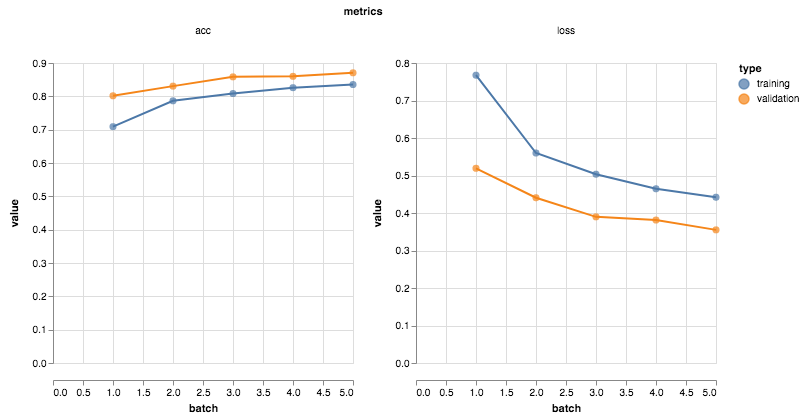

In [20]:
vis.metrics(history.history)

In [21]:
score = cnn.evaluate(x_test_conv, y_test_class)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 9s 931us/step
Test loss: 0.35502173528671266
Test accuracy: 0.8705


**Step 5: Make & Visualise the Prediction**

In [22]:
predict_classes_cnn = cnn.predict_classes(x_test_conv)

In [26]:
pd.crosstab(y_test, predict_classes_cnn)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,870,0,14,45,8,1,55,0,7,0
1,2,977,0,13,3,0,3,0,2,0
2,18,0,821,7,66,0,87,0,1,0
3,26,13,6,873,40,0,41,0,1,0
4,1,1,79,29,779,0,108,0,3,0
5,0,0,0,0,0,981,0,15,0,4
6,211,0,102,34,95,0,539,0,19,0
7,0,0,0,0,0,32,0,948,0,20
8,2,0,8,5,4,3,3,2,973,0


In [31]:
proba_cnn = cnn.predict_proba(x_test_conv)

In [32]:
i = 5

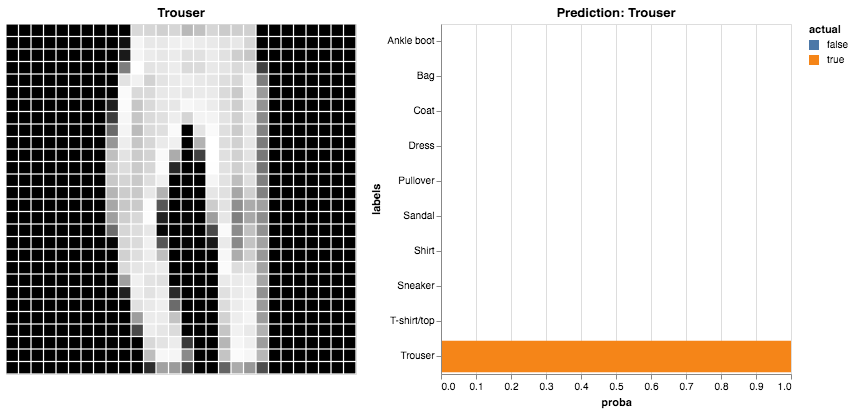

In [33]:
vis.imshow(x_test[i], labels[y_test[i]]) | vis.predict(proba_cnn[i], y_test[i], labels)